<a href="https://colab.research.google.com/github/aadi-kanwar/Algorithms/blob/main/Unifrom_Cost_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Uniform Seach Algorithm
# 14.08.2024

In [14]:
!pip install networkx

Path found: ['A', 'C', 'G']
Total cost: 4
Visited nodes in order: ['A', 'B', 'F', 'C', 'D', 'E', 'G']


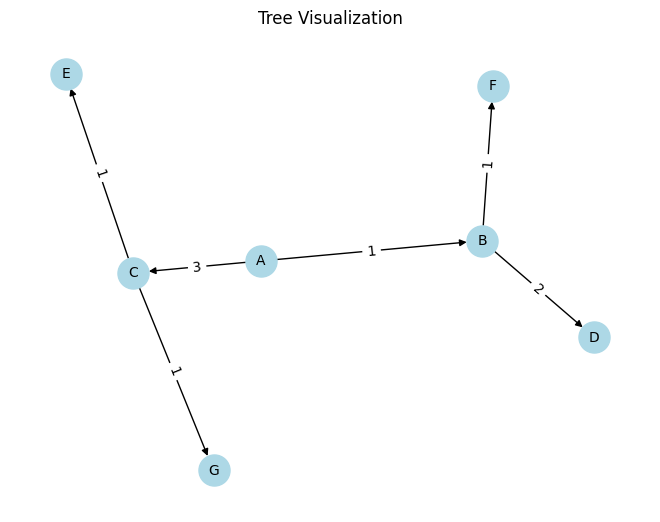

In [28]:
# prompt: make the above code simpler and now also make a separate list of all the visited nodes in the order in which they are visited

import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, state, parent=None, cost=0):
        self.state = state
        self.parent = parent
        self.cost = cost

def uniform_cost_search_tree(goal, start):
    queue = [Node(start)]
    visited = []  # List to store visited nodes in order
    tree = nx.DiGraph()

    while queue:
        queue.sort(key=lambda node: node.cost)
        node = queue.pop(0)

        if node.state in visited:
            continue

        visited.append(node.state)  # Mark the node as visited
        tree.add_node(node.state)

        if node.state == goal:
            return node, tree, visited

        for child_state, child_cost in get_children(node.state):
            child_node = Node(child_state, node, node.cost + child_cost)
            queue.append(child_node)
            tree.add_edge(node.state, child_state, weight=child_cost)

    return None, None, None

def get_children(state):
    children = {
        'A': [('B', 1), ('C', 3)],
        'B': [('D', 2), ('F',1)],
        'C': [('E', 1), ('G',1)],
    }
    return children.get(state, [])

goal_state = 'G'
start_state = 'A'

result_node, tree, visited_nodes = uniform_cost_search_tree(goal_state, start_state)

if result_node:
    path = []
    node = result_node
    while node:
        path.append(node.state)
        node = node.parent
    path.reverse()

    print("Path found:", path)
    print("Total cost:", result_node.cost)
    print("Visited nodes in order:", visited_nodes)

    pos = nx.spring_layout(tree)
    nx.draw(tree, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(tree, pos, edge_labels=nx.get_edge_attributes(tree, 'weight'))
    plt.title("Tree Visualization")
    plt.show()
else:
    print("Goal not found.")
